# EDA

 1. 데이터 불러오기
 2. 데이터 정보 관측하기
 3. 데이터 크기 파악하기
 4. 데이터 피쳐 알아보기

In [48]:
# 0. 라이브러리 불러오기
import pandas as pd

In [12]:
# 1 ~ 4
# csv파일을 df으로 불러오기
train = pd.read_csv('../data/와인/train.csv')
test = pd.read_csv('../data/와인/test.csv')


print('train data 확인')
train.info()

# 행, 열 확인
print('train data shape? :',train.shape)
print('test data shape? :',test.shape)

print('train data 속 각 칼럼의 정보 확인')
train.head()

train data 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ K

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


#### 결측치 유무 확인

다행히 train, test데이터 모두 결측치가 존재하진 않음

In [13]:
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [14]:
test.isnull().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

#### 수치형 데이터 요약하기 : `describe()`

다양한 통계량을 요약하주는 메서드. 데이터프레임 각 열(only 수치형 데이터)에 대해 요약이 수행

**describe에서 제공하는 통계량**
- count, mean, std, min, 1분위수, 2분위수, 3분위수, max

In [15]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


## EDA - **시각화**

- 종속변수(quality) : 우리가 예측하고자 하는 변수
- 시각화할 때는 복사본 생성 후 진행 : `copy()`

### matplotlib, seaborn 라이브러리
종속변수 분포 시각화 > 머신러닝의 방향성 파악

In [16]:
# 한글 글꼴 다운
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 결과 출력 설정
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') # 글꼴
plt.rc('axes', unicode_minus=False) # '-' 출력

import warnings # 분석에 문제없는 경고 메시지 숨기기
warnings.filterwarnings('ignore')


In [18]:
train = pd.read_csv('../data/와인/train.csv')

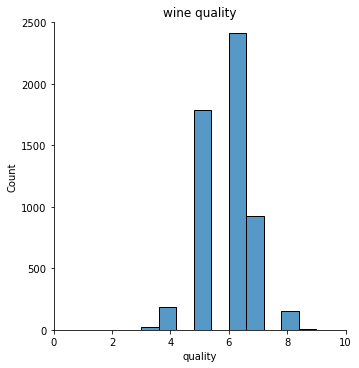

In [19]:
# 분석을 위해 학습용 데이터 복사
traindata = train.copy()

# 타겟 변수(와인 품질) 분포 시각화
sns.displot(traindata['quality'], kde=False, bins=10)
plt.axis([0,10,0,2500]) # [x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값]
plt.title('wine quality') # 제목
plt.show() # 그래프 그리기

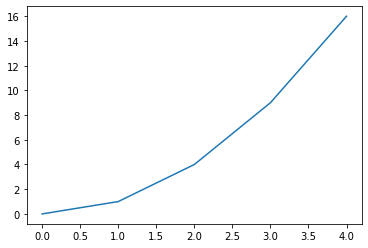

In [20]:
# plot()

x_values = [0,1,2,3,4]
y_values = [0,1,4,9,16]

plt.plot(x_values, y_values)
plt.show()

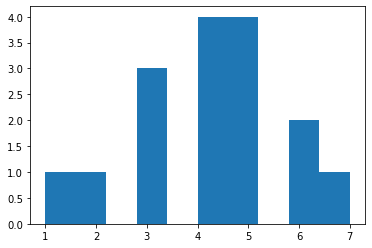

In [21]:
# Histogram

a = [1,2,3,3,3,4,4,4,4,5,5,5,5,6,6,7]

plt.hist(a)
plt.show()

-------

# Preprocessing

## 이상치 탐지 & 제거

<AxesSubplot:>

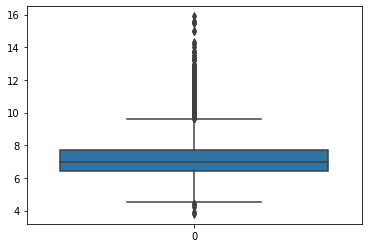

In [22]:
# IQR - boxplot()
# 피쳐 'fixed acidity'의 이상치 확인
sns.boxplot(data=train['fixed acidity'])

### boxplot 분석
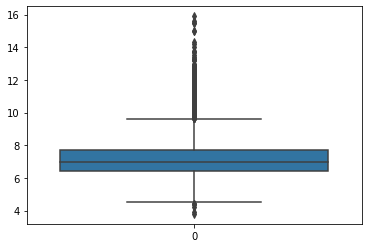


In [26]:
# IQR로 이상치 제거
import numpy as np

quantile_25 = np.quantile(train['fixed acidity'], 0.25)
quantile_75 = np.quantile(train['fixed acidity'], 0.75)
IQR = quantile_75 - quantile_25 # 박스의 길이
minimum = quantile_25 - 1.5 * IQR # 4 ~ 6 사이에 선
maximum = quantile_75 + 1.5 * IQR # 8 ~ 10 사이에 선

In [27]:
train2 = train[(minimum <= train['fixed acidity']) & (train['fixed acidity'] <= maximum)]
train2.shape

(5203, 14)

In [28]:
# 이상치 개수 확인 : 294개의 이상치를 제거한 train2
train.shape[0] - train2.shape[0]

294

## Nomalization

`트리 기반 모델`(desion tree, random forest)들은 크고 작음으로 판단하기 때문에 숫자의 단위에 큰 영향을 받지 않지만
<br>`평활 함수 모델`(logistic regression, lasso)들은 숫자의 크기와 단위에 영향을 많이 받음. 
<br><br>**`수치형 데이터 정규화`**를 통해 모든 모델에 어울리는 데이터를 만듦

## Scailing - **MinMaxScailer**

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
train.describe() # fixed acidity 데이터 분포 체크

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

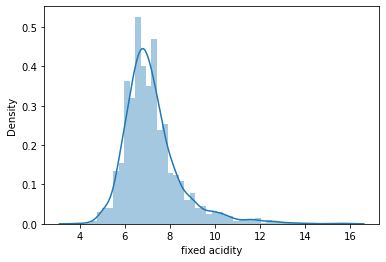

In [30]:
sns.distplot(train['fixed acidity']) # fixed acidity의 distplot

In [33]:
scaler = MinMaxScaler()

In [35]:
# scaler 학습
scaler.fit(train[['fixed acidity']])

MinMaxScaler()

In [36]:
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

<AxesSubplot:xlabel='Scaled fixed acidity', ylabel='Density'>

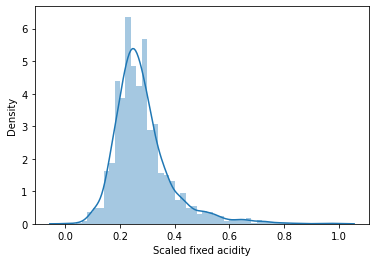

In [37]:
# Scaled한 fixed acidity의 distplot
sns.distplot(train['Scaled fixed acidity'])

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

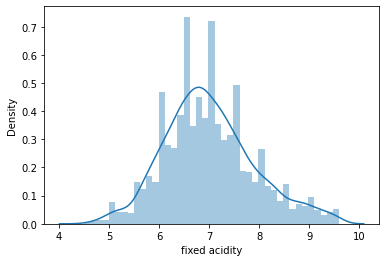

In [38]:
# 이상치 제거한 train2의 distplot
sns.distplot(train2['fixed acidity'])

In [39]:
# train2 minmax 정규화 ( 0 ~ 1 사이의 값을 변환)

scaler2 = MinMaxScaler()
scaler2.fit(train2[['fixed acidity']])
train2['Scaled fixed acidity'] = scaler2.transform(train2[['fixed acidity']])

<AxesSubplot:xlabel='Scaled fixed acidity', ylabel='Density'>

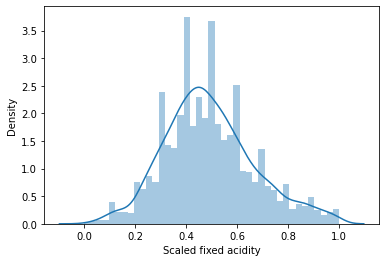

In [40]:
sns.distplot(train2['Scaled fixed acidity'])

In [43]:
train2.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity
count,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000
mean,2753.771670,5.821065,7.004132,0.332852,0.309366,5.573131,0.054088,31.337113,119.578897,0.994472,3.222862,0.521893,10.504133,0.491006
std,1587.326459,0.868565,0.906623,0.162106,0.140360,4.828254,0.033831,17.536054,54.483795,0.002926,0.161715,0.143725,1.201914,0.177769
min,0.000000,3.000000,4.500000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,0.000000
25%,1380.500000,5.000000,6.400000,0.220000,0.240000,1.800000,0.037000,18.000000,86.000000,0.992160,3.110000,0.430000,9.500000,0.372549
50%,2754.000000,6.000000,6.900000,0.290000,0.300000,3.300000,0.046000,30.000000,121.000000,0.994600,3.210000,0.500000,10.300000,0.470588
75%,4129.500000,6.000000,7.500000,0.390000,0.380000,8.300000,0.060000,42.000000,157.000000,0.996660,3.330000,0.590000,11.300000,0.588235
max,5496.000000,9.000000,9.600000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.200000,1.000000


## Encoding - One Hot Encoding

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
train = pd.read_csv('../data/와인/train.csv')

In [69]:
encoder = OneHotEncoder()

# encoder로 train의 type 피쳐 학습
encoder.fit(train[['type']])
# onehot - train type피쳐 변환
onehot = encoder.transform(train[['type']])
onehot

<5497x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5497 stored elements in Compressed Sparse Row format>

In [70]:
# dtype('float64')
onehot 

<5497x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5497 stored elements in Compressed Sparse Row format>

In [71]:
# Array 변환
onehot = onehot.toarray()
onehot

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [72]:
# Dataframe 변환
onehot = pd.DataFrame(onehot)
onehot.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [73]:
# column 이름 변경
onehot.columns = encoder.get_feature_names()
onehot.head()

,x0_red,x0_white
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [74]:
# onehot 데이터를 train 데이터에 병합

onehot = pd.concat([train, onehot], axis = 1)
onehot.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,0.0,1.0


In [75]:
# train의 type변수를 onehot encoding시켰기 때문에 type 변수 제거
train = train.drop(columns= ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9


### OneHot 요약

In [76]:
train = pd.read_csv('../data/와인/train.csv')
encoder = OneHotEncoder()
onehot = pd.DataFrame(encoder.fit_transform(train[['type']]).toarray(), columns = encoder.get_feature_names())
train = pd.concat([train,onehot], axis = 1).drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.0,1.0


--------

# Modeling

## Ensemble - **RandomForestClassifier**

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
# define Model
random_classifier = RandomForestClassifier()
random_classifier


RandomForestClassifier()

In [80]:
# X : train data
X = train.drop(columns=['quality'])
# y : predict result(quality)
y = train['quality']

# training
random_classifier.fit(X, y)

RandomForestClassifier()

## **K-Fold(교차검증)**

### Hold-out

모델의 성능을 예측(검증)해보기 위해<br>
**train data → train set(학습용) / vaild set(검증용)** 으로 나누는 작업<br>
*보통 train : vaild = 7 : 3 / 8 : 2 로 나눔*

*but 데이터의 낭비라는 문제가 발생* > sol. **K-Fold(교차검증)**

### 교차검증
> 모든 데이터를 최소한 한 번씩 다 학습하게 하자!

학습할 때마다 valid set이 겹치지 않도록 N 개의 데이터셋을 만들어 모든 train data 들이 최소 한 번씩 학습에 사용되게 하는 방벙

In [102]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [103]:
kf = KFold(n_splits= 5, shuffle= True, random_state= 0)

In [104]:
# train & valid set에 접근하기
for train_idx, valid_idx in kf.split(train) : 
    train_data = train.iloc[train_idx]
    valid_data = train.iloc[valid_idx]
    print(train_data.head())
    print('-----------------------')
    print(valid_data.head())

   index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   
2      2        5            7.9             0.210         0.39   
3      3        6            7.0             0.210         0.31   
5      5        6            6.0             0.190         0.37   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   
2             2.0      0.057                 21.0                 138.0   
3             6.0      0.046                 29.0                 108.0   
5             9.7      0.032                 17.0                  50.0   

   density    pH  sulphates  alcohol  x0_red  x0_white  
0  0.99432  3.44       0.44     10.2     0.0       1.0  
1  0.99690  3.19       0.59     

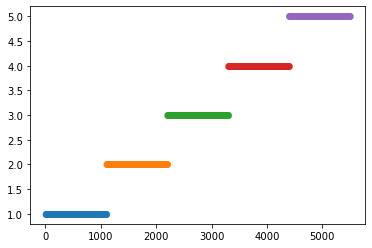

In [105]:
import matplotlib.pyplot as plt

# shuffle = False : 5개 데이터셋에 vaild 데이터가 겹치지 않고 나눠진 것을 확인
kf = KFold(n_splits = 5, shuffle = False)
train_idx_store = []
valid_idx_store = []


i = 1

for train_idx, valid_idx in kf.split(train) :
    plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha = 0.1)
    i += 1
plt.show()

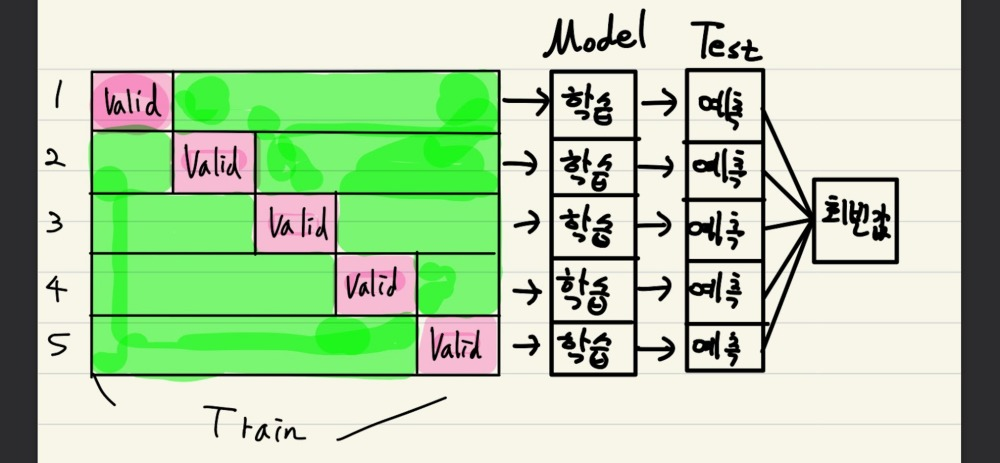

### Process

1. K-Fold를 이용해서 Train과 Valid Data를 나눈다.
2. Model을 이용해서 train 데이터를 학습한다.
3. Model을 이용해서 valid 데이터를 예측해 성능을 확인한다.
4. Model을 이용해서 test 데이터를 예측한다.
5. n_splits를 5로 설정한다면, 5개의 결과값들에 대한 “최빈값”을 이용해 가장 등장할 가능성이 높은 결과값으로 결정한다.
6. 결과를 제출한다.


In [109]:
train = pd.read_csv('../data/와인/train.csv')
test = pd.read_csv('../data/와인/test.csv')

# Scailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])

# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])

onehot = encoder.transform(test[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
test = pd.concat([test, onehot], axis = 1)
test = test.drop(columns = ['type'])

In [110]:
# X, y 변수 선언
X = train.drop(columns=['index', 'quality'])
y = train['quality']

# k-fold 변수 선언
kf = KFold(n_splits= 5, shuffle= True, random_state= 0)

# Model 선언 - RandomForestClassifier
model = RandomForestClassifier(random_state=0)

# 모델 예측 결과, 테스트 예측 결과 저장 리스트
valid_scores = []
test_predictions = []

In [111]:
# Training

for train_idx, valid_idx in kf.split(X, y):
    # train & valid set X, y 설정
    X_tr = X.iloc[train_idx] # X에서 특정 idx 행에 있는 값들만 추출
    y_tr = y.iloc[train_idx]
    
    X_val = X.iloc[valid_idx]
    y_val = y.iloc[valid_idx]
    
    # Model training
    model.fit(X_tr, y_tr)
    
    # model 검증하기 - valid 데이터로 model 성능 예측, 결과
#     valid_prediction = model.predict(X_val)
#     # 검증한 모델의 정확도
#     score = accuracy_score(y_val, valid_prediction)
#     valid_scores.append(score)
#     print(score)
    
    # Test 예측
    test_prediction = model.predict(test.drop(columns = ['index']))
    test_predictions.append(test_prediction)
# print('검증한 모델의 정확도(평균) : ', np.mean(valid_scores)) # 0.6761829762594094


In [112]:
# model별 Test 예측 결과 출력
test_predictions = pd.DataFrame(test_predictions)
test_predictions

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,5,6,6,5,6,6,6,6,6,7,...,6,6,6,5,7,6,6,5,6,6
1,5,6,6,5,6,6,6,6,6,7,...,6,6,6,6,7,6,6,5,6,6
2,6,6,6,5,6,6,6,6,6,7,...,6,6,6,6,7,5,6,5,6,6
3,5,6,6,6,6,6,5,6,6,6,...,6,6,6,6,7,6,6,5,6,6
4,5,6,6,5,7,6,5,6,6,7,...,6,6,6,6,6,6,5,5,6,7


In [114]:
# test 최종 예측 결과 : col별 최빈값 저장, 첫번 째 행의 결과(최종 결과값)

# df.mode() : col별 최빈값 확인
test_prediction = test_predictions.mode()
test_prediction = test_predictions.values[0]
test_prediction

array([5, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 5, 7, 6, 5, 5, 6, 7, 5, 6, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 4, 6, 5, 5, 6, 4, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 7, 5,
       7, 6, 6, 5, 5, 6, 6, 7, 7, 5, 6, 5, 6, 7, 5, 5, 6, 6, 6, 7, 5, 5,
       6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 7, 6, 5, 8, 6, 5,
       6, 5, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 5, 6, 6, 7, 6, 6,
       6, 6, 7, 6, 5, 6, 6, 6, 5, 6, 7, 7, 6, 6, 6, 7, 7, 6, 7, 5, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 5, 7, 7,
       6, 6, 6, 6, 5, 5, 5, 6, 5, 7, 8, 6, 5, 7, 6,

In [115]:
# 제출하기
sample_submission = pd.read_csv('../data/와인/sample_submission.csv')
sample_submission['quality'] = test_prediction
sample_submission.to_csv('submission_KFOLD.csv', index=False)